# Denpendency structures between uncertain numbers

In [1]:
from pyuncertainnumber import pba
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

```{note}
Dependencies between uncertain variables (e.g. probability distributions) are often ignored or assumed independence without justification. However, neglecting the incertitude about the dependency structure and assuming independence anyway constitutes a methodological bad practice. No only does the `pyuncertainnumber` ease the account for epistemic uncertainty in marginal distributions, but also provides user-fridendly syntax for various dependency structure.
```

<figure style="text-align: center;">
    <img src="../../_static/dependency_illustration.png" width="1000">
    <figcaption>Dependency structures </figcaption>
</figure>

<!-- <figure style="text-align: center;">
    <img src="ensemble_constraint_curves.png" width="500">
    <figcaption>Figure 1: Demonstration of uncertainty on an examplar cruise constraint where an ensemble of curves may be possible </figcaption>
</figure> -->

## Binary dependency

When the inter-variable dependency is unknown, the Frechet bound will be utilised to faithfully reflect the state of of knowledge that any dependency structure is possible and will be enclosed within the Frechet bound. In addition, when there is empirical knowledge about dependency, it can be specified with an addtional argument.

In [ ]:
# construction of p-boxes for illustrational purpose
a = pba.uniform([1,2], 4)
b = a

In [3]:
c_f = a + b # frechet

# for any other dependency {independence, perfect, oppposite}
c_i = a.add(b, dependency="i")  # independence

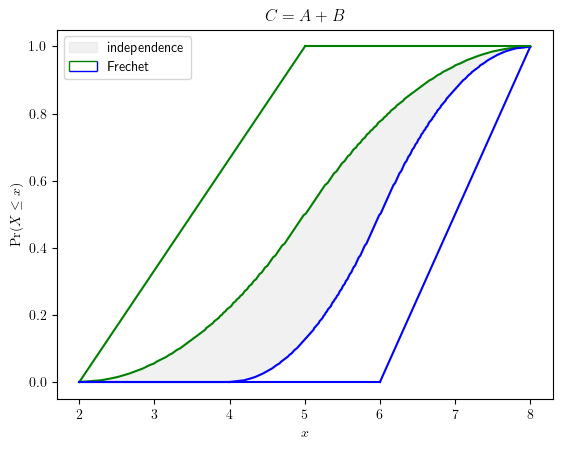

In [4]:
fig, ax = plt.subplots()
c_i.plot(ax=ax, label='independence', nuance='curve')
c_f.plot(style='simple', ax=ax, label='Frechet', nuance='curve')
ax.set_title("$C=A+B$")
plt.show()

More conveniently, users can utilise the `with` statement to specify an environment of a certain dependency, for example "independence" or "perfect".

In [7]:
# define a dummy response function
def foo(x):
    return x[0]**3 + x[1] + x[2]

# define uncertain numbers
a = pba.normal([2,3], [1])
b = pba.normal([10,14], [1])
c = pba.uniform([4,5], [10,11])
x = [a,b,c]

In [8]:
with pba.dependency("p"):
    y = foo(x)

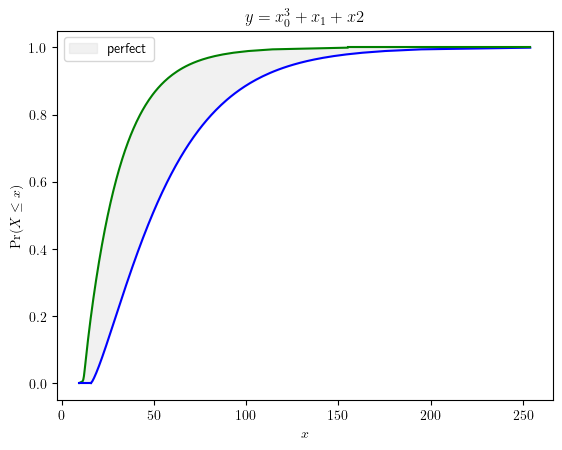

In [23]:
y.display(label="perfect", nuance='curve', title="$y = x_0^3 + x_1 + x2$")

```{tip}
**smart dependency tracking**
A smart dependency tracking mechanism is underway
```

## Dependency object

One can easily construct a multivariate copula to specify the dependency structure.

In [10]:
gaussian_copula = pba.Dependency(family='gaussian', 
                                 corr=0.5)

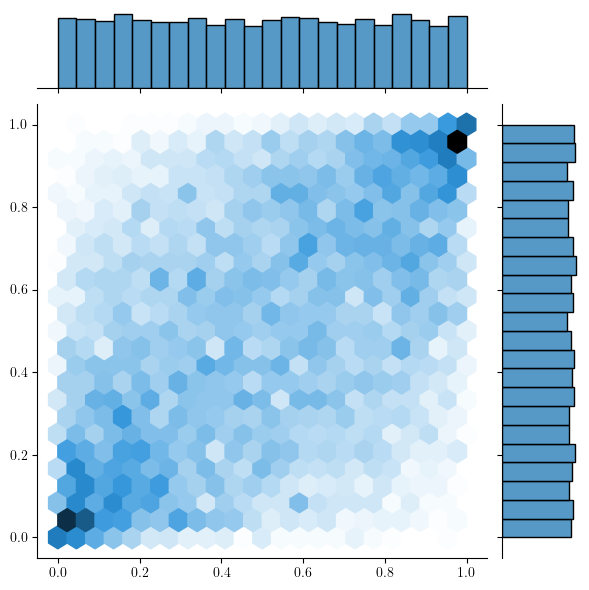

In [11]:
g_s = gaussian_copula.u_sample(10_000)
h = sns.jointplot(x=g_s[:, 0], y=g_s[:, 1], kind="hex")

## Dependency specification in non-intrusive propagation 

```{note}
**dependency when working with black box models**
Various dependency structure (e.g. copula) can be specified when working with black box models, our non-intrusive propagation APIs provides an argument to take declared dependency structure.
```

In [ ]:
import pyuncertainnumber.propagation.mixed_up as mix
corre_matrix = np.array([[1, 0.5, 0.3], [0.5, 1, 0.4], [0.3, 0.4, 1]])
de = pba.Dependency(family='gaussian', corr=corre_matrix)

In [20]:
p = mix.interval_monte_carlo(
    vars=[a,b,c], 
    func=foo, 
    dependency=de,
    interval_strategy='direct', 
    n_sam=10_000
)  

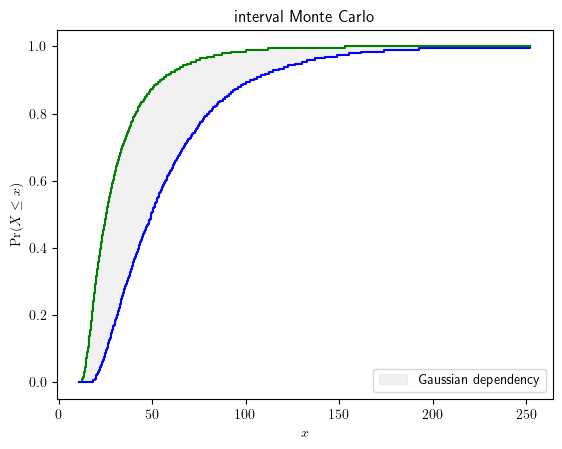

In [22]:
p.display(title='interval Monte Carlo', label='Gaussian copula')